# 综合项目：少样本区分奇特草莓


In [2]:
#数据增强
from keras.preprocessing.image import ImageDataGenerator
path = 'task2_data//labeled_data'
dst_path = 'task2_data//gen_data'
datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.02,horizontal_flip=True,vertical_flip=True)
gen = datagen.flow_from_directory(path,target_size=(224,224),batch_size=2,save_to_dir=dst_path,save_prefix='gen',save_format='jpg')
for i in range(100):
    gen.next()

Found 12 images belonging to 1 classes.


In [3]:
#单张图片加载
from keras.preprocessing.image import load_img,img_to_array
img_path = '1.jpg'
img = load_img(img_path,target_size=(224,224))
print(type(img))

<class 'PIL.Image.Image'>


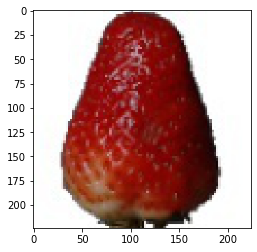

In [4]:
#可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.imshow(img)

In [5]:
#格式转化
img = img_to_array(img)
print(type(img))

<class 'numpy.ndarray'>


In [6]:
print(img.shape)

(224, 224, 3)


In [7]:
#维度转化与数据预处理
from keras.applications.vgg16 import preprocess_input
import numpy as np
img_p = np.expand_dims(img,axis=0)
print(img_p.shape)

(1, 224, 224, 3)


In [8]:
img_p = preprocess_input(img_p)

In [9]:
#VGG16提取特征
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet',include_top=False)
features = model_vgg16.predict(img_p)
print(features.shape,features)

(1, 7, 7, 512) [[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    4.9918442e+00 0.0000000e+00]

In [10]:
#特征展开
features = features.reshape(-1,7*7*512)
print(features.shape)

(1, 25088)


In [12]:
#图像批量操作提取
import os
folder = 'task2_data//training_data'
files_name = os.listdir(folder)
print(files_name)
img_path = []
for i in files_name:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path = [folder + '//' + i for i in img_path]
print(img_path)

['1.jpg', '10.jpg', '100.jpg', '11.jpg', '12.jpg', '13.jpg', '137_100.jpg', '14.jpg', '143_100.jpg', '145_100.jpg', '148_100.jpg', '15.jpg', '150_100.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'gen_0_1123087.jpg', 'gen_0_1356088.jpg', 'gen_0_1821400.jpg', 'gen_0_2114499.jpg', 'gen_0_2268574.jpg', 'gen_0_2512784.jpg', 'gen_0_2680085.jpg', 'gen_0_3062752.jpg', 'gen_0_3337601.jpg', 'gen_0_3845779.jpg', 'gen_0_4160375.jpg', 'gen_0_4225108.jpg', 'gen_0_4304826.jpg', 'gen_0_4400218.jpg', 'gen_0_4490829.jpg', 'gen_0_4744957.jpg', 'gen_0_550695.jpg', 'gen_0_5863474.jpg', 'gen_0_6331605.jpg', 'gen_0_6553900.jpg', 'gen_0_6744497.jpg', 'gen_0_7154019.jpg', 'gen_0_7471002.jpg', 'gen_0_7495948.jpg', 'gen_0_7765412.jpg', 'gen_0_7938669.jpg', 'gen_0_8100281.jpg', 'gen_0_8162928.jpg', 'gen_0_8396607.jpg', 'gen_0_9255948.jpg', 'gen_0_9428350.jpg', 'gen_0_9560045.jpg', 'gen_0_9596210.jpg', 'gen_0_995627.jpg', 

In [13]:
# VGG16特征提取方法的定义
def modelProcess(img_path,model):
    img = load_img(img_path,target_size=(224,224))
    img = img_to_array(img)
    img_p = np.expand_dims(img,axis=0)
    img_p = preprocess_input(img_p)
    img_vgg = model.predict(img_p)
    img_vgg = img_vgg.reshape(1,7*7*512)
    return img_vgg

In [14]:
#批量提取图片特征
features_train = np.zeros([len(img_path),7*7*512])
for i in range(len(img_path)):
    features_temp = modelProcess(img_path[i],model_vgg16)
    features_train[i] = features_temp
    print('preprocess:',img_path[i])

preprocess: task2_data//training_data//1.jpg
preprocess: task2_data//training_data//10.jpg
preprocess: task2_data//training_data//100.jpg
preprocess: task2_data//training_data//11.jpg
preprocess: task2_data//training_data//12.jpg
preprocess: task2_data//training_data//13.jpg
preprocess: task2_data//training_data//137_100.jpg
preprocess: task2_data//training_data//14.jpg
preprocess: task2_data//training_data//143_100.jpg
preprocess: task2_data//training_data//145_100.jpg
preprocess: task2_data//training_data//148_100.jpg
preprocess: task2_data//training_data//15.jpg
preprocess: task2_data//training_data//150_100.jpg
preprocess: task2_data//training_data//16.jpg
preprocess: task2_data//training_data//17.jpg
preprocess: task2_data//training_data//18.jpg
preprocess: task2_data//training_data//19.jpg
preprocess: task2_data//training_data//2.jpg
preprocess: task2_data//training_data//20.jpg
preprocess: task2_data//training_data//21.jpg
preprocess: task2_data//training_data//3.jpg
preprocess:

In [15]:
#样本数量与特征数
print(features_train.shape)

(440, 25088)


In [16]:
X = features_train

In [17]:
#kmeans聚类分析
from sklearn.cluster import KMeans
vgg_kmeans = KMeans(n_clusters=2,max_iter=3000)
#训练
vgg_kmeans.fit(X)

KMeans(max_iter=3000, n_clusters=2)

In [18]:
#预测
y_predict_km = vgg_kmeans.predict(X)
print(y_predict_km)

[1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1
 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
#结果分布统计
import pandas as pd
print(pd.value_counts(y_predict_km))

1    221
0    219
dtype: int64


In [20]:
#普通草莓id
normal_strawberry_id = 1

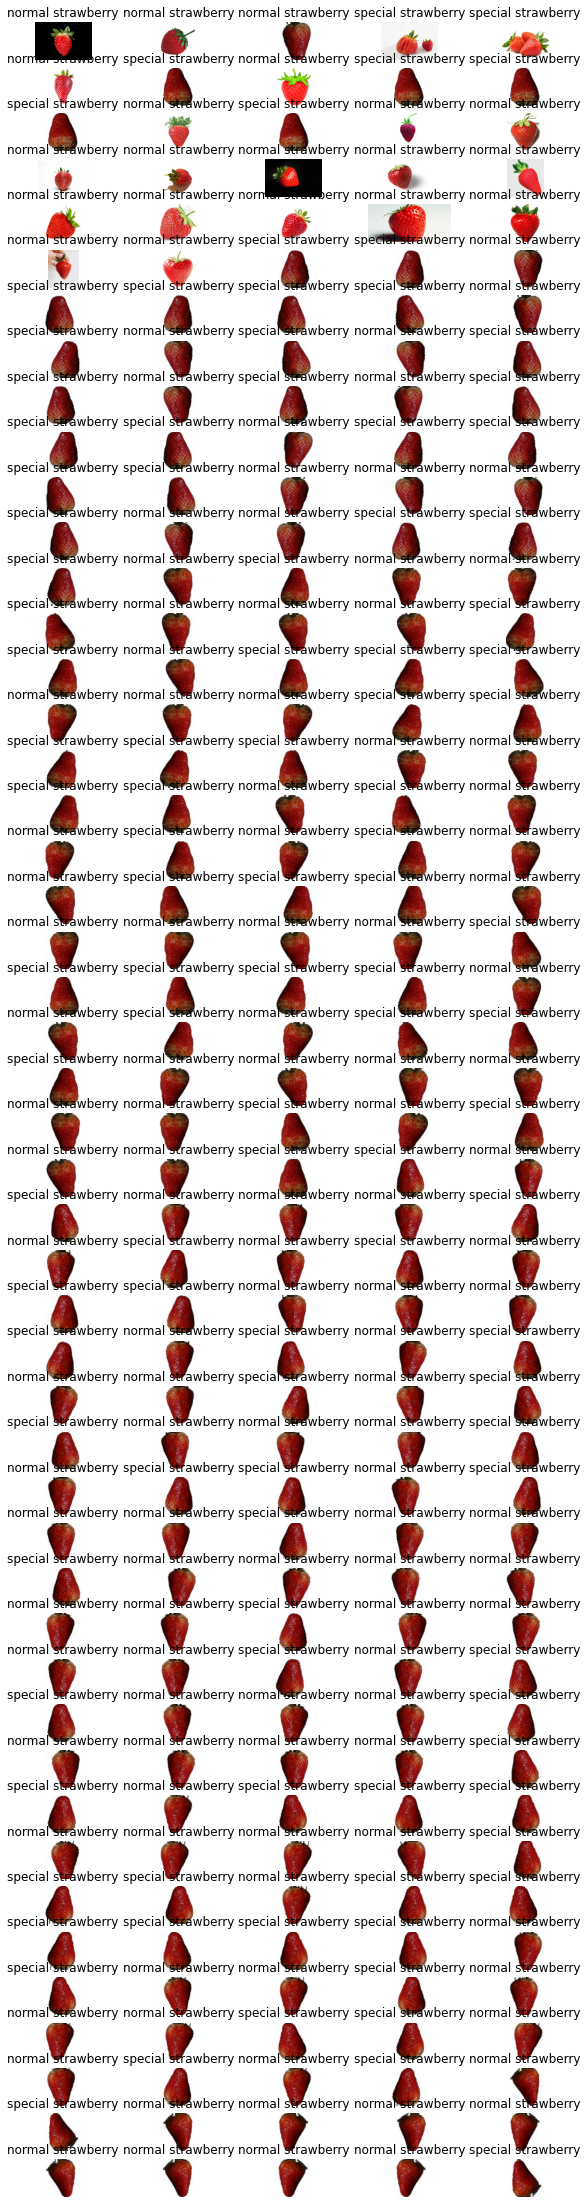

In [21]:
fig2 = plt.figure(figsize=(10,40))
for i in range(48):
    for j in range(5):
        img = load_img(img_path[i*5 + j])
        plt.subplot(48,5,5*i+j+1)
        plt.title('normal strawberry' if y_predict_km[i*5+j]==normal_strawberry_id else 'special strawberry')
        plt.imshow(img)
        plt.axis('off')

In [22]:
from sklearn.cluster import MeanShift,estimate_bandwidth
#获取合适的meanshift半径
bw = estimate_bandwidth(X,n_samples=150)
print(bw)

1486.4752533948742


In [23]:
vgg_ms = MeanShift(bandwidth=bw)
vgg_ms.fit(X)

MeanShift(bandwidth=1486.4752533948742)